In [15]:
#Imports

import pandas as pd 
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv("https://raw.githubusercontent.com/leotasso3/Xtream_Tasso/main/datasets/employee-churn/churn.csv")
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [11]:
missing_values = df.isna().sum()
print(missing_values)

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64


In [12]:
# Getting the binary target classes frequency

target_frequency = df['target'].value_counts()
target_frequency

target
0.0    14381
1.0     4777
Name: count, dtype: int64

In [13]:
df.describe()
# will get only continuos variables 

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

It can immediatly be observed that the dataset is slightly imabalanced towards the negative class (loyal employees).
I will start with investigating the categorical variables: for doing that, I will start from the assumption that there isn't a significant relationship between these variables and the binary target. This means that for each category (each value) of the categorical variables, we expect to find the same proportion of positive and negative labels that is present in the whole dataset. 
I will therefore compute, for all the categorical variables, the relative frequency of each value with respect to both the positive and the negative class. 
If, for example, a value higher than 25% is found for a particular value, we could say that for that specific value of the variable under examination, the occurrence of positive labels deviates from the expected proportion in the dataset. This deviation might imply a potential association between the categorical variable and the target variable, and could therefore constitute a distinctive trait for the likelihood of a person not to be loyal.
I will also provide a graphic representation with an histogram displaying the relative frequencies of each class

In [16]:
# this function is aimed at computing the relative frequency for each value of a categorical variable (given as input) of the dataset.
# the percentages shown on the right of the output represent the relative frequency of the class with respect to the target variable.
# Indeed, for each class, the sum of the 2 values related to the specific target value will always sum up to 1.

def get_relative_frequences(column_name):
    
    print("{:<23} {:<8} {}".format(column_name, 'target', 'value')) # Printing table head row

    unique_values = df[column_name].unique() # storing all the unique values for the given cateforical variable 
    frequency_per_value = df.groupby(column_name)['target'].value_counts()

    for val in unique_values:
        if pd.isnull(val):
            continue
        
        count_positive = frequency_per_value.get((val, 1.0), 0)  # Getting the count the class with respect to the positive class
        total_count = count_positive + frequency_per_value.get((val, 0.0), 0)  # Getting the overall sum of the occurrencies for the class

        if total_count != 0:  # Evita divisione per zero
            perc = count_positive / total_count
        else:
            perc = 0
        print("{:<23} {:<8} {:.2f}".format(val, 1.0, perc))


        count_negative = frequency_per_value.get((val, 0.0), 0)  # Getting the count the class with respect to the negative class

        if total_count != 0:  # Evita divisione per zero
            perc = count_negative / total_count
        else:
            perc = 0
        print("{:<23} {:<8} {:.2f}".format(val, 0.0, perc))


    CrosstabResult=pd.crosstab(index=df[column_name],columns=df['target'])   # getting the absolute frequency of the classes
    CrosstabResult.plot.bar(figsize=(7,4), rot=0)


gender                  target   value
Male                    1.0      0.23
Male                    0.0      0.77
Female                  1.0      0.26
Female                  0.0      0.74
Other                   1.0      0.26
Other                   0.0      0.74


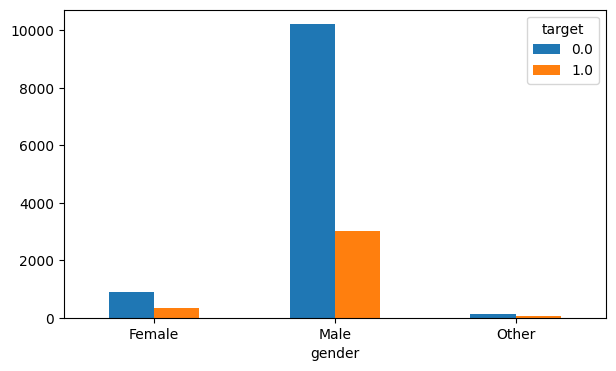

In [17]:
get_relative_frequences('gender')

relevent_experience     target   value
Has relevent experience 1.0      0.21
Has relevent experience 0.0      0.79
No relevent experience  1.0      0.34
No relevent experience  0.0      0.66


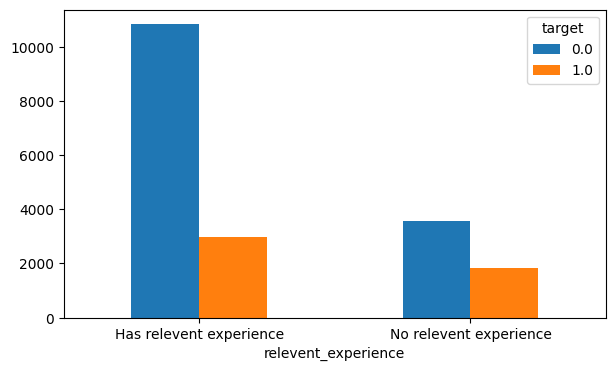

In [18]:
get_relative_frequences('relevent_experience')

enrolled_university     target   value
no_enrollment           1.0      0.21
no_enrollment           0.0      0.79
Full time course        1.0      0.38
Full time course        0.0      0.62
Part time course        1.0      0.25
Part time course        0.0      0.75


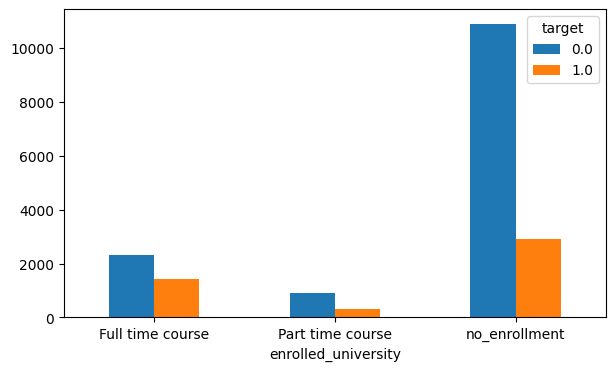

In [19]:
get_relative_frequences('enrolled_university')

education_level         target   value
Graduate                1.0      0.28
Graduate                0.0      0.72
Masters                 1.0      0.21
Masters                 0.0      0.79
High School             1.0      0.20
High School             0.0      0.80
Phd                     1.0      0.14
Phd                     0.0      0.86
Primary School          1.0      0.13
Primary School          0.0      0.87


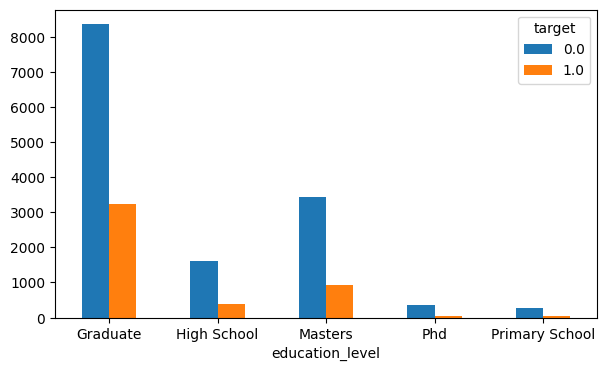

In [20]:
get_relative_frequences('education_level')

major_discipline        target   value
STEM                    1.0      0.26
STEM                    0.0      0.74
Business Degree         1.0      0.26
Business Degree         0.0      0.74
Arts                    1.0      0.21
Arts                    0.0      0.79
Humanities              1.0      0.21
Humanities              0.0      0.79
No Major                1.0      0.25
No Major                0.0      0.75
Other                   1.0      0.27
Other                   0.0      0.73


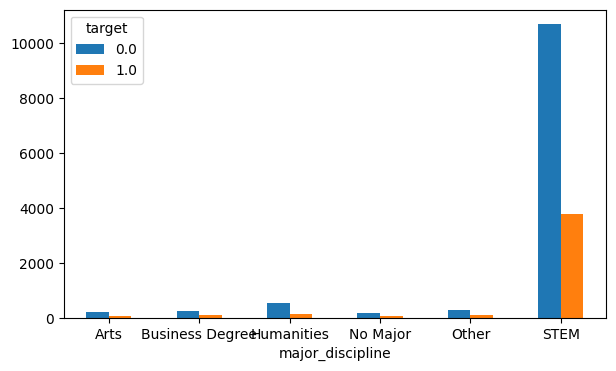

In [21]:
get_relative_frequences('major_discipline')

experience              target   value
>20                     1.0      0.15
>20                     0.0      0.85
15                      1.0      0.17
15                      0.0      0.83
5                       1.0      0.29
5                       0.0      0.71
<1                      1.0      0.45
<1                      0.0      0.55
11                      1.0      0.23
11                      0.0      0.77
13                      1.0      0.19
13                      0.0      0.81
7                       1.0      0.29
7                       0.0      0.71
17                      1.0      0.17
17                      0.0      0.83
2                       1.0      0.33
2                       0.0      0.67
16                      1.0      0.14
16                      0.0      0.86
1                       1.0      0.42
1                       0.0      0.58
4                       1.0      0.33
4                       0.0      0.67
10                      1.0      0.21
10         

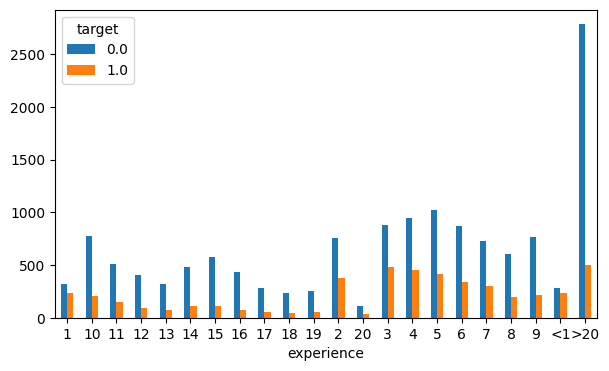

In [22]:
get_relative_frequences('experience')

company_size            target   value
50-99                   1.0      0.18
50-99                   0.0      0.82
<10                     1.0      0.17
<10                     0.0      0.83
10000+                  1.0      0.19
10000+                  0.0      0.81
5000-9999               1.0      0.18
5000-9999               0.0      0.82
1000-4999               1.0      0.15
1000-4999               0.0      0.85
10/49                   1.0      0.23
10/49                   0.0      0.77
100-500                 1.0      0.16
100-500                 0.0      0.84
500-999                 1.0      0.17
500-999                 0.0      0.83


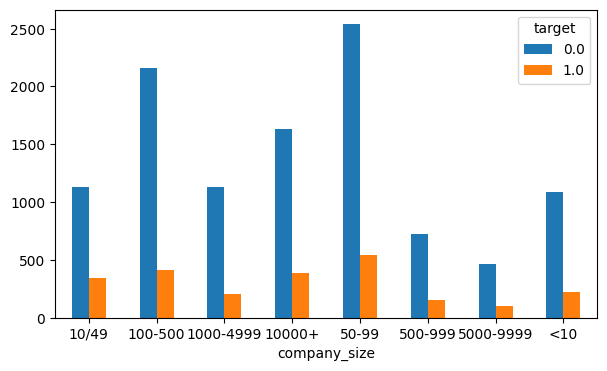

In [23]:
get_relative_frequences('company_size')

company_type            target   value
Pvt Ltd                 1.0      0.18
Pvt Ltd                 0.0      0.82
Funded Startup          1.0      0.14
Funded Startup          0.0      0.86
Early Stage Startup     1.0      0.24
Early Stage Startup     0.0      0.76
Other                   1.0      0.24
Other                   0.0      0.76
Public Sector           1.0      0.22
Public Sector           0.0      0.78
NGO                     1.0      0.19
NGO                     0.0      0.81


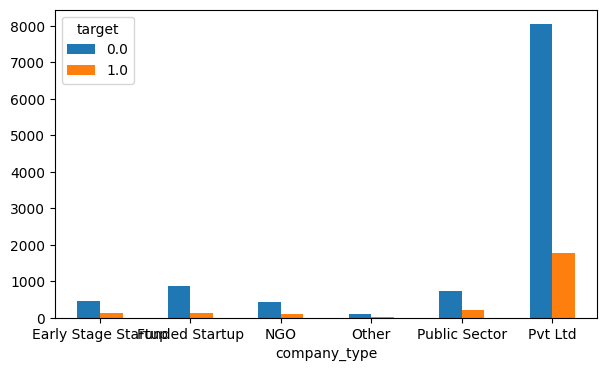

In [24]:
get_relative_frequences('company_type')

last_new_job            target   value
1                       1.0      0.26
1                       0.0      0.74
>4                      1.0      0.18
>4                      0.0      0.82
never                   1.0      0.30
never                   0.0      0.70
4                       1.0      0.22
4                       0.0      0.78
3                       1.0      0.23
3                       0.0      0.77
2                       1.0      0.24
2                       0.0      0.76


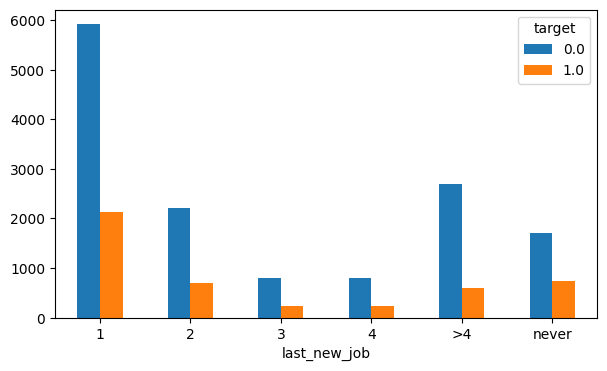

In [25]:
get_relative_frequences('last_new_job')

For the 'city' column, note that the graphical representation shouldn't be considered, as there are 73 classes and the graph is not fit for that many instances.
However, the relative frequency of the classes still consists useful information.
Furthermore, to speed up the investigation activity, I have provided a cell of code which returns the set of cities where there is either a prevalence of non loyal people, or where more than 90% of the people living in that city are loyal.

In [26]:
unique_city_values = df['city'].unique() # storing all the unique city values 


frequency_per_value = df.groupby('city')['target'].value_counts()
relevent_cities = []

for val in unique_city_values:
    if pd.isnull(val):
        continue
    
    count_positive = frequency_per_value.get((val, 1.0), 0)  # Getting the count the class with respect to the positive class
    total_count = count_positive + frequency_per_value.get((val, 0.0), 0)  # Getting the overall sum of the occurrencies for the class

    if total_count != 0:  # Evita divisione per zero
        perc = count_positive / total_count
        
        if perc >= 0.6:
            relevent_cities.append(val)

    else:
        perc = 0


    count_negative = frequency_per_value.get((val, 0.0), 0)  # Getting the count the class with respect to the negative class

    if total_count != 0:  # Evita divisione per zero
        perc = count_negative / total_count

        if perc >= 0.9:
            relevent_cities.append(val)
    else:
        perc = 0


print(relevent_cities)

['city_61', 'city_114', 'city_104', 'city_36', 'city_97', 'city_138', 'city_82', 'city_28', 'city_23', 'city_72', 'city_39', 'city_77', 'city_155', 'city_33', 'city_62', 'city_2', 'city_111', 'city_140', 'city_179', 'city_42', 'city_107', 'city_139', 'city_129', 'city_8', 'city_171']


city                    target   value
city_103                1.0      0.21
city_103                0.0      0.79
city_40                 1.0      0.15
city_40                 0.0      0.85
city_21                 1.0      0.59
city_21                 0.0      0.41
city_115                1.0      0.39
city_115                0.0      0.61
city_162                1.0      0.29
city_162                0.0      0.71
city_176                1.0      0.29
city_176                0.0      0.71
city_160                1.0      0.24
city_160                0.0      0.76
city_46                 1.0      0.27
city_46                 0.0      0.73
city_61                 1.0      0.10
city_61                 0.0      0.90
city_114                1.0      0.10
city_114                0.0      0.90
city_13                 1.0      0.12
city_13                 0.0      0.88
city_159                1.0      0.15
city_159                0.0      0.85
city_102                1.0      0.17
city_102   

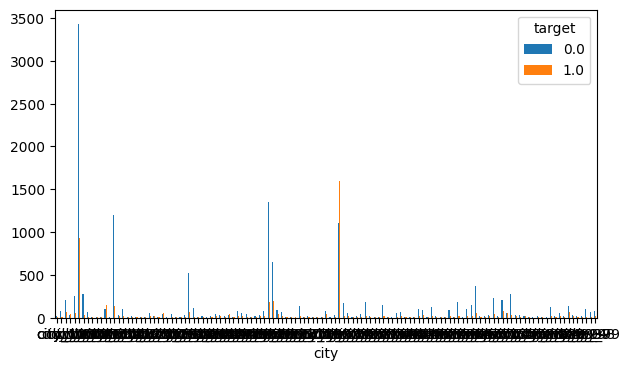

In [27]:
get_relative_frequences('city')

Findings on categorical variables:

Going across the variables' classes relative frequency, it is possible to observe that for some values there is a significant deviation from what are expected frequencies for the positive and negative classes. 
Let's take the example of the enrolled university variable: given this dataset, if a person is enrolled in a full time course, he or she will be an unloyal employee with a probablity of 38%. And if we start from the assumption that being enrolled in a full time course is not a distinctive characteristic for an employee to be loyal or not, we expect the latter value to be around 25%. A value of 38% tells us that if a person is enrolled in a full time course, it will be more probable for him not to be a loyal employee, compared to the 'average' employee present in this dataset.
The same way of reasoning applies for the frequency related to the negative class which are higher than 75%. Like the people belonging to a company with size 1000-4999: they will indeed have a 85% probability to be loyal. 
Finding these kind of values will tell us which are the distinctive traits of loyal and non loyal employees. 
Other relevant values are the following:

-an experience >20 years -> 85% of being a loyal employee and 15% of not being a loyal employee
-a difference between the last new job >4 years -> 82% of being a loyal employee and 18% of not being a loyal employee
-Pvt ltd company type -> 82% of being a loyal employee and 18% of not being a loyal employee
-an experience 16 years -> 86% of being a loyal employee and 14% of not being a loyal employee
-Humanities as major discipline -> 79% of being a loyal employee and 21% of not being a loyal employee
